In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse

In [3]:
# Load
As_trade = []
for i in range(30):
    A_sparse = sparse.load_npz(f"datasets/tgbn-trade/tgbn-trade_As_{i}.npz")
    As_trade.append(A_sparse)

node_labels_trade = np.load("datasets/tgbn-trade/tgbn-trade_node_labels.npy")


In [4]:
# Load
As_sbm = []
for i in range(8):
    A_sparse = sparse.load_npz(f"datasets/sbm/sbm_As_{i}.npz")
    As_sbm.append(A_sparse)

node_labels_sbm = np.load("datasets/sbm/sbm_node_labels.npy")


In [5]:
# Load
As_flight = []
for i in range(36):
    A_sparse = sparse.load_npz(f"datasets/flight_data/flight_As_{i}.npz")
    As_flight.append(A_sparse)

node_labels_flight = np.load("datasets/flight_data/flight_node_labels.npy")


In [7]:
# Load
As_school = []
for i in range(18):
    A_sparse = sparse.load_npz(f"datasets/school/school_As_{i}.npz")
    As_school.append(A_sparse)

node_labels_school = np.load("datasets/school/school_node_labels.npy")



In [8]:
num_edges_trade = []
for A in As_trade:
    A_binary = np.where(A.todense() > 0, 1, 0)
    num_edges_trade.append(np.sum(A_binary))

num_edges_sbm = []
for A in As_sbm:
    A_binary = np.where(A.todense() > 0, 1, 0)
    num_edges_sbm.append(np.sum(A_binary))

num_edges_school = []
for A in As_school:
    A_binary = np.where(A.todense() > 0, 1, 0)
    num_edges_school.append(np.sum(A_binary))

num_edges_flight = []
for A in As_flight:
    A_binary = np.where(A.todense() > 0, 1, 0)
    num_edges_flight.append(np.sum(A_binary))


/tmp/ipykernel_150050/2610907919.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(xlabels)
/tmp/ipykernel_150050/2610907919.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(xlabels)
/tmp/ipykernel_150050/2610907919.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(xlabels)


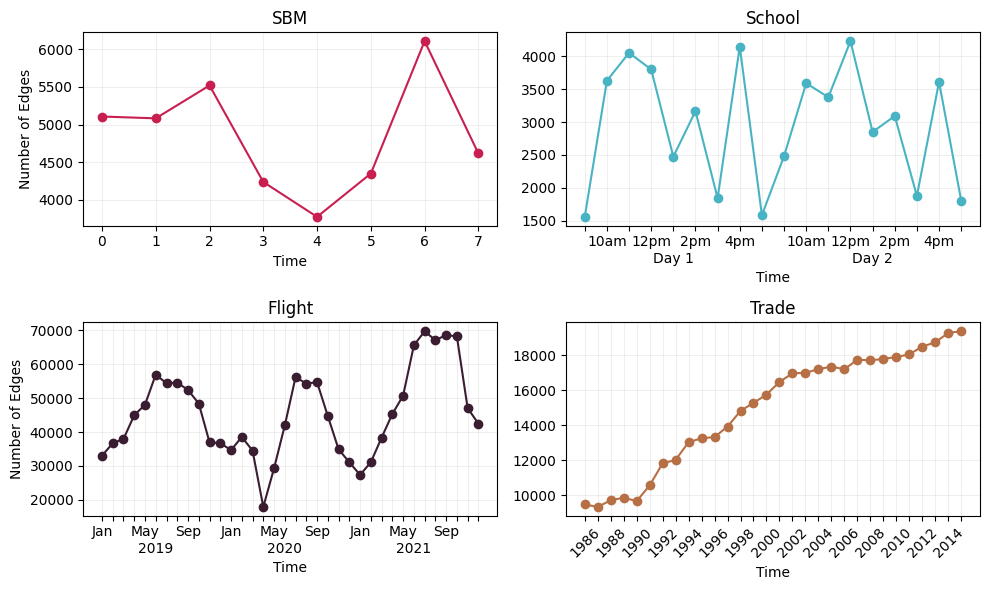

In [9]:
colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex=False)


axs[0, 0].plot(num_edges_sbm, label="SBM", c=colours[0], marker="o")
axs[0, 0].set_title("SBM")

axs[0, 1].plot(num_edges_school, label="School", c=colours[1], marker="o")
axs[0, 1].set_title("School")
xlabels = [
    "",
    "10am",
    "",
    "12pm",
    "\nDay 1",
    "2pm",
    "",
    "4pm",
    "",
    "",
    "10am",
    "",
    "12pm",
    "\nDay 2",
    "2pm",
    "",
    "4pm",
    "",
]
axs[0, 1].set_xticklabels(xlabels)


axs[1, 0].plot(num_edges_flight, label="Flight", c=colours[2], marker="o")
axs[1, 0].set_title("Flight")
xlabels = [
    "Jan",
    "",
    "",
    "",
    "May",
    "\n2019",
    "",
    "",
    "Sep",
    "",
    "",
    "",
    "Jan",
    "",
    "",
    "",
    "May",
    "\n2020",
    "",
    "",
    "Sep",
    "",
    "",
    "",
    "Jan",
    "",
    "",
    "",
    "May",
    "\n2021",
    "",
    "",
    "Sep",
    "",
    "",
    "",
]
axs[1, 0].set_xticklabels(xlabels)


axs[1, 1].plot(num_edges_trade, label="Trade", c=colours[3], marker="o")
axs[1, 1].set_title("Trade")

years = np.arange(1986, 2016)
xlabels = [str(year) if year % 2 == 0 else "" for year in years]
axs[1, 1].set_xticklabels(xlabels)

# rotate the x axis for this plot only
for ax in axs[1, 1].get_xticklabels():
    ax.set_rotation(45)


# Labeling the x-axis and y-axis of the subplots
for ax in axs.flat:
    ax.set(xlabel="Time", ylabel="Number of Edges")

    ax.grid(alpha=0.2)

# Hide y axis title for the right side plots
axs[0, 1].set(ylabel="")
axs[1, 1].set(ylabel="")

axs[0, 0].set_xticks(np.arange(0, len(num_edges_sbm)))
axs[0, 1].set_xticks(np.arange(0, len(num_edges_school)))
axs[1, 0].set_xticks(np.arange(0, len(num_edges_flight)))
axs[1, 1].set_xticks(np.arange(0, len(num_edges_trade)))


# plt.show()
plt.tight_layout()

# save plot
# plt.savefig("figures/num_edges_per_dataset.pdf", dpi=300)
